In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = [20, 15]

In [3]:
CROP_PIXELS = 2
PADDING = 0
RATIO_HEIGHT = 0.4
RATIO_WIDTH = 0.75

In [4]:
image = cv2.imread('/home/trucly/Documents/DATASET/hw_collect/textlines/0007_3.png')
height, width, _ = image.shape
height, width = height - CROP_PIXELS, width - CROP_PIXELS
image = image[CROP_PIXELS: height, CROP_PIXELS: width]

In [5]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.blur(gray, (5, 5), 0)
ret, thresh1 = cv2.threshold(gray, 140, 255, cv2.THRESH_BINARY_INV)

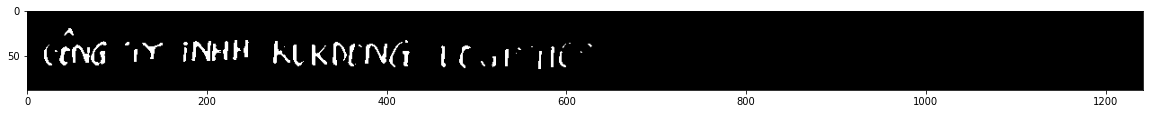

In [6]:
plt.imshow(thresh1, cmap='gray')

In [7]:
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 18))
dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1)
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 

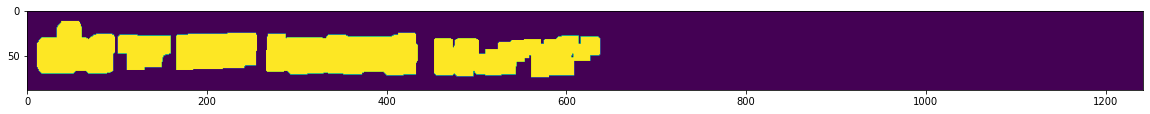

In [8]:
plt.imshow(dilation)

In [9]:
y_top, y_bottom = height, 0
x_left, x_right = width, 0
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    if h >= height * RATIO_HEIGHT and w <= width * RATIO_WIDTH:
        y_top = min(y_top, y)
        y_bottom = max(y_bottom, y + h)
        x_left = min(x_left, x)
        x_right = max(x_right, x + w)
        rect = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

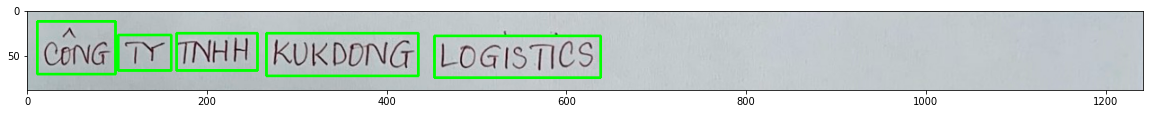

In [10]:
plt.imshow(image)

In [11]:
crop_image = image[max(0, y_top - PADDING): min(y_bottom + PADDING, height),
                        max(0, x_left - PADDING): min(x_right + PADDING, width)]

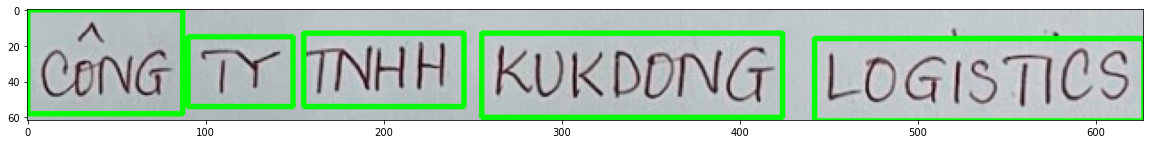

In [12]:
plt.imshow(crop_image)